## Tugas Besar 1 
### MK Visualisasi Data Gasal 2020/2021

<b>Nama<b>: Fernanda Januar Pratama <br> 
<b>NIM<b>: 1301170756

#### Aturan umum:
1. Setiap soal dievaluasi berdasarkan _code program_ dan penjelasan yang dibuat.
2. File _midterm project_ yang telah dikerjakan harus di-submit melalui LMS.
3. Batas akhir submit file adalah 1 November 2020 pukul 21:00.
4. <b><font color='red'>Setiap tindakan plagiarism akan berakibat pada ketidaklulusan pada MK ini.</font><b>

### Kasus 1: Pima Indian Diabetes Data Set (Soal 1 - 2)
Dataset ini berasal dari the National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari pengumpulan dataset ini untuk dapat memprediksi secara diagnosis apakah seseorang mengidap penyakit diabetes atau tidak berdasarkan beberapa pengukuran diagnostik. Seluruh pasien pada dataset ini adalah perempuan keturunan India Pima yang berumur kurang dari 21 tahun.<br><br>
Dataset terdiri dari beberapa variabel prediktor medis dan satu variabel target sebagai _outcome_. Variabel prediktor di antaranya jumlah kehamilan, BMI, level insulin, usia, dll.lin level, age, and so on. Dataset dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/3i3gfr8pih4jwd4/diabetes.csv?dl=0)

In [1]:
import pandas as pd
import seaborn as sn
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
mpl.style.use('ggplot')

### Soal 1 (15 poin)
Tampilkan visualisasi distribusi data untuk variabel "Glucose" dan "Insulin", lalu jelaskan hasil distribusinya.

#### Code

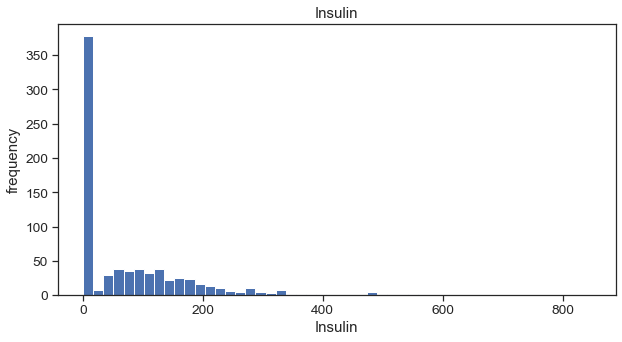

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
0    0
dtype: int64


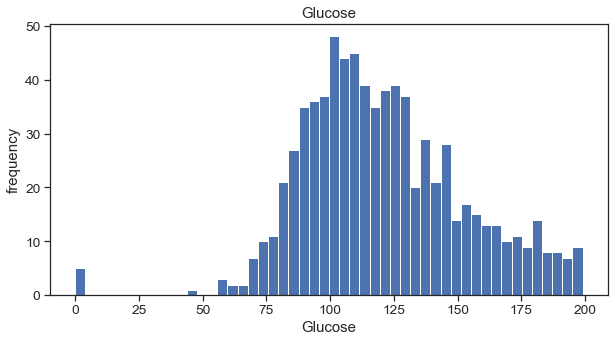

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
0     99
1    100
dtype: int64


In [172]:
diabetes_df = pd.read_csv("diabetes.csv")

# Plotting distribution
#sn.jointplot(diabetes_df["Insulin"], diabetes_df["Glucose"], height=7
def plot_dist(x):
    diabetes_df[x].plot.hist(bins=50, figsize=(10,5))
    plt.title(x)
    plt.xlabel(x)
    plt.ylabel("frequency")
    plt.show()
    print(diabetes_df[x].describe())
#    print(diabetes_df[x].mode())

plot_dist("Insulin")
plot_dist("Glucose")

#### Penjelasan
Pada grafik insulin diperlihatkan bahwa distribusinya memiliki bentuk "skewed right", hal ini disebabkan karena data insulin bernilai 0 lebih mendominasi. Hal ini mengakibatkan distribusi insulin memiliki nilai rata-rata 79, padahal jika dilihat pada grafik insulin diatas rata-rata jumlah insulin berkisar < 50. sehingga untuk data yang mengalami "skewed" disarankan memakai "mode".

Pada grafik glucose cenderung memiliki bentuk mendekati symmetric, hal ini dapat diartikan bahwa distribusi pada data ini sangat bagus.

### Soal 2 (25 poin)
Tampilkan visualisasi dari korelasi (i) antar variabel dan (ii) antara variabel dan target, lalu jelaskan hasil korelasinya.

#### Code

<function matplotlib.pyplot.show(close=None, block=None)>

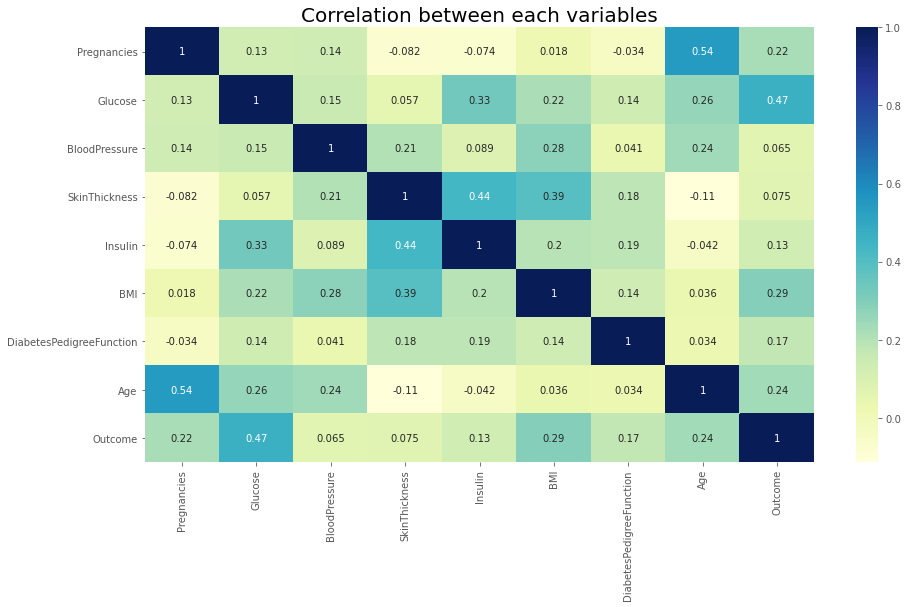

In [80]:
# correlation between each variables
corr = diabetes_df.corr()
plt.figure(figsize=(15,8))
sn.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("Correlation between each variables", fontsize=20)
plt.show

In [213]:
# Correlation between features and target
diabetes_df.drop("Outcome", axis=1).apply(lambda x: x.corr(diabetes_df["Outcome"]))
#diabetes_df[diabetes_df.columns].corr()['Outcome'][:]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
dtype: float64

#### Penjelasan 
Untuk menampilan visualisasi korelasi tiap variabel yang ada saya menggunakan heatmap, dimana pada grafik heatmap dapat diperlihatkan correlation value pada masing-masing variabel. Untuk nilai korelasi < 0 maka korelasi variabel tersebut sangat buruk, sedangkan semakin tinggi nilai nya maka korelasi antara variabel tersebut semakin bagus.

Untuk menampilkan visualisasi korelasi antara variabel dan target, saya menggunakan corr() function untuk mendapatkan hasil korelasi tersebut. Variabel "Glucose" memiliki nilai korelasi tertinggi sehingga dapat disimpulkan bahwa kemungkinan jumlah glukosa yang tinggi dapat menyebabkan terjadinya diabetes.

### Kasus 2: Stock Market Analysis (Soal 3 - 4)
Pada kasus ini, kita akan membandingkan beberapa parameter yang diturunkan dari data historis harga saham dari 3 perusahaan, yaitu Nasdaq, Nikkei dan Hang Seng. Data set dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/0wny6x5sio9nvap/stock_market.zip?dl=0).

### Soal 3 (30 poin)
Lakukanlah _trend analysis_ nilai _daily percentage change_ dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan melalui visualisasi data.
_Trend analysis_ dilakukan dengan menggunakan hubungan berikut:
![output%2011.png](https://www.dl.dropboxusercontent.com/s/dxmrm74ksz5l9v2/trend_analysis_fig.png?dl=0)

#### Code

In [5]:
# Read data from csv file
Nasdaq_df = pd.read_csv("stock_market/Nasdaq.csv")
Nikkei_df = pd.read_csv("stock_market/Nikkei.csv")
Hangseng_df = pd.read_csv("stock_market/Hang_Seng.csv")

# Changes the type of date
Nasdaq_df["Date"] = pd.to_datetime(Nasdaq_df["Date"])
Nikkei_df["Date"] = pd.to_datetime(Nikkei_df["Date"])
Hangseng_df["Date"] = pd.to_datetime(Hangseng_df["Date"])

# Create a new column with year of "Date" field
Nasdaq_df["Year"] = pd.DatetimeIndex(Nasdaq_df["Date"]).year
Nikkei_df["Year"] = pd.DatetimeIndex(Nikkei_df["Date"]).year
Hangseng_df["Year"] = pd.DatetimeIndex(Hangseng_df["Date"]).year

# Filter the Year column into "2019"
Nasdaq_df_2019 = Nasdaq_df.loc[Nasdaq_df["Year"] == 2019]
Nikkei_df_2019 = Nikkei_df.loc[Nikkei_df["Year"] == 2019]
Hangseng_df_2019 = Hangseng_df.loc[Hangseng_df["Year"] == 2019]

In [6]:
# Day percentage change
Nasdaq_df_2019['Day_Perc_Change'] = Nasdaq_df_2019["Adj Close"].pct_change()*100
Nikkei_df_2019['Day_Perc_Change'] = Nikkei_df_2019["Adj Close"].pct_change()*100
Hangseng_df_2019['Day_Perc_Change'] = Hangseng_df_2019["Adj Close"].pct_change()*100

# Drop NaN value
Nasdaq_df_2019.dropna(axis=0, inplace=True)
Nikkei_df_2019.dropna(axis=0, inplace=True)
Hangseng_df_2019.dropna(axis=0, inplace=True)

# Make the "Date" column an index
Nasdaq_df_2019.index = Nasdaq_df_2019["Date"]
Nikkei_df_2019.index = Nikkei_df_2019["Date"]
Hangseng_df_2019.index = Hangseng_df_2019["Date"]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

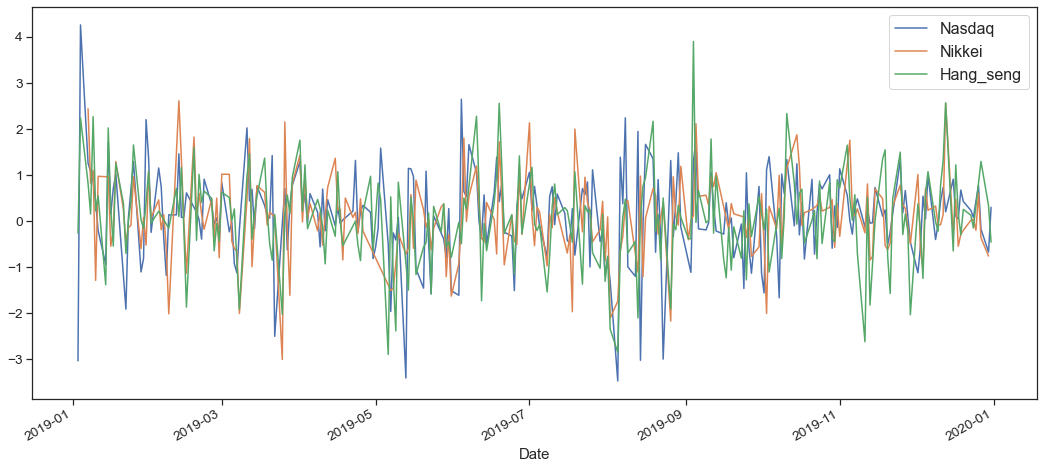

In [159]:
def plot_dpc(x): 
    x["Day_Perc_Change"].plot(figsize=(18,8))
    plt.legend(labels=["Nasdaq", "Nikkei", "Hang_seng"], fontsize=16)

plot_dpc(Nasdaq_df_2019)
plot_dpc(Nikkei_df_2019)
plot_dpc(Hangseng_df_2019)

In [7]:
# Trend analysis
def trend_analysis(x):
    if x > -0.5 and x <= 0.5:
        return "Slight or No change"
    elif x > 0.5 and x <= 1:
        return "Slight Positive"
    elif x > -1 and x <= -0.5:
        return "Slight Negative"
    elif x > 1 and x <= 3:
        return "Positive"
    elif x > -3 and x <= -1:
        return "Negative"
    elif x > 3 and x <= 7:
        return "Among top gainers"
    elif x > -7 and x <= -3:
        return "Among top losers"
    elif x > 7:
        return "Bull run"
    elif x <= -7:
        return "Bear drop"

Nasdaq_df_2019["Trend"] = Nasdaq_df_2019['Day_Perc_Change'].apply(lambda x:trend_analysis(x))
Nikkei_df_2019["Trend"] = Nikkei_df_2019['Day_Perc_Change'].apply(lambda x:trend_analysis(x))
Hangseng_df_2019["Trend"] = Hangseng_df_2019['Day_Perc_Change'].apply(lambda x:trend_analysis(x))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

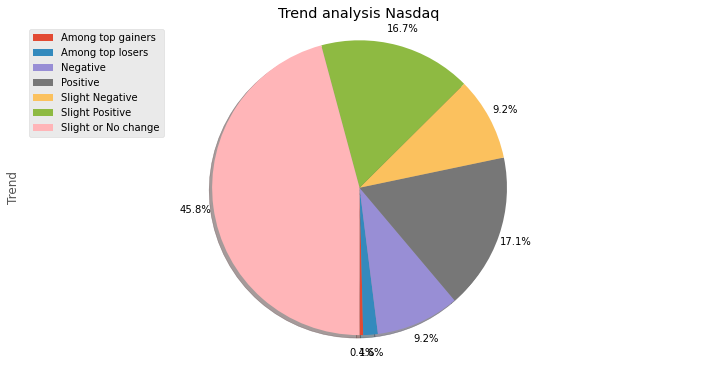

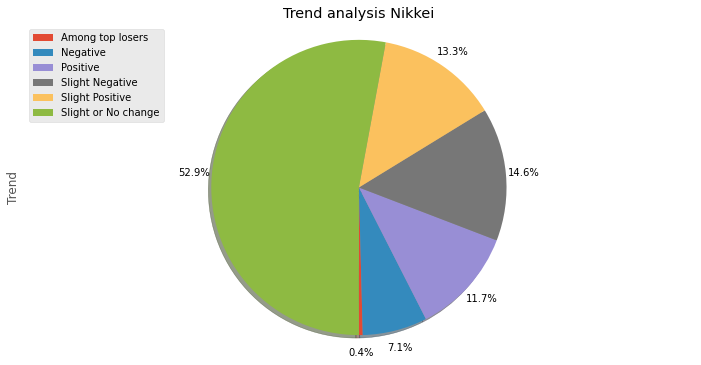

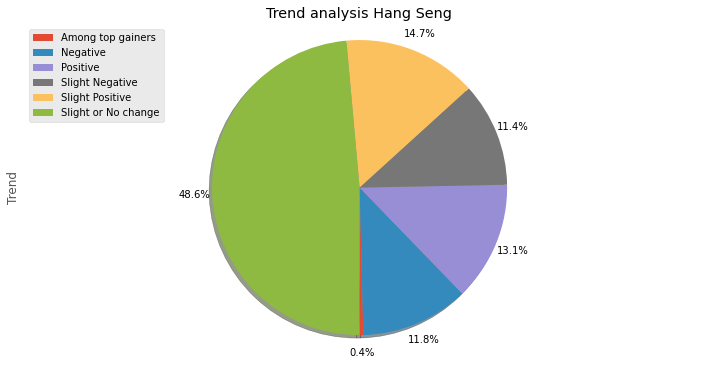

In [8]:
def plotting_trend(x):
    group_trend = x.groupby("Trend")
    pie_label = sorted([i for i in x.loc[:, "Trend"].unique()])
    group_trend['Trend'].count().plot(kind='pie', 
                                 labels = None, 
                                 autopct = '%1.1f%%', 
                                 figsize=(12, 6), 
                                 shadow=True, 
                                 pctdistance=1.12, 
                                 startangle=-90)

    plt.legend(labels=pie_label, loc='upper left') 
    plt.axis('equal')
    
plotting_trend(Nasdaq_df_2019)
plt.title("Trend analysis Nasdaq")
plt.show()

plotting_trend(Nikkei_df_2019)
plt.title("Trend analysis Nikkei")
plt.show()
    
plotting_trend(Hangseng_df_2019)
plt.title("Trend analysis Hang Seng")
plt.show()

#### Penjelasan 
Pada pie chart diatas dapat disimpulkan dari semua transaksi pada saham Nasdaq, Nikkei dan Hang_seng. Sebagian besar terjadi "slight or no change" yang berarti fluktuasi saham tidak ada perubahan atau daily percentage change nya sama seperti hari sebelumnya, sehingga peluang terjadi keuntungannya atau top gainer nya kecil.

Untuk "among top gainers" memiliki persentase kecil yang berarti semakin kecil persentase top gainers maka keuntungan yang didapat semakin besar.

Jika dibandingkan dengan ketiga saham tersebut, fluktuasi saham Nikkei tidak mendekati trend "among top gainers" sehingga nilai keuntungan yang didapat tidak maksimal jika dibandingkan dengan saham Nasdaq dan Hang_seng.

### Soal 4 (30 poin)
Lakukanlah analisis volatilitas dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan hasil visualisasinya.

#### Code

In [27]:
Nasdaq_df_2019["Adj Close"].count(), Nikkei_df_2019["Adj Close"].count()

(251, 240)

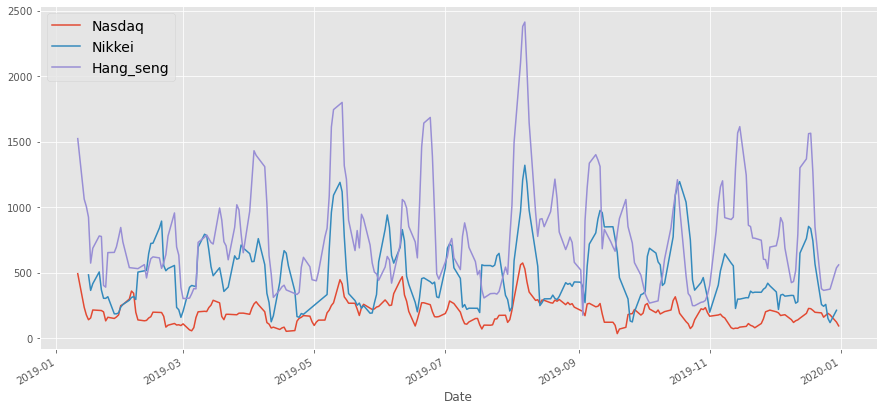

In [35]:
# Volatility
def plotting_volatility(x):
    volatility = x["Adj Close"].rolling(7).std()*np.sqrt(7)
    volatility.dropna(how="any", axis=0, inplace=True)
    volatility.plot(figsize = (15, 7))
    
    plt.legend(labels=["Nasdaq", "Nikkei", "Hang_seng"], 
               loc='upper left', 
               prop={"size":14}) 

plotting_volatility(Nasdaq_df_2019)
plotting_volatility(Nikkei_df_2019)
plotting_volatility(Hangseng_df_2019)

#### Penjelasan 
Pada grafik diatas dapat disimpulkan bahwa saham Hang_seng memiliki volatilitas yang lebih tinggi dibandingkan dengan Nasdaq dan Nikkei, sehingga peluang terjadinya penurunan yang lebih besar. Ketidakstabilan tersebut memberikan peluang untuk membeli saham dengan harga murah dan menjualnya saat harga terlalu mahal.

Sebaliknya saham Nasdaq yang cenderung memiliki volatilitas yang kecil memiliki peluang yang kecil pada penurunan harga saham.